Wilford Akwasi Asare Adjei- Home Work ( Advance Quantitative Methods and Machine Learning in Finance)

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [104]:
# data = pd.read_excel('https://www.dropbox.com/scl/fi/ma25frizp5p8kws8d5u0z/Equal-Weights.xlsx?rlkey=90cx1jatlw5gr7x24dvosg15v&dl=0')
data = pd.read_excel('C:\\Users\\wilfo\\Downloads\\Assignment.xlsx')

In [106]:
def calculate_sharpe_ratio(returns, risk_free_rate=0.02/12):  # Using 2% annual rf rate
    excess_returns = returns - risk_free_rate
    annual_sharpe = np.sqrt(12) * (excess_returns.mean()) / returns.std()
    return annual_sharpe

def calculate_semi_deviation(returns):

    return np.sqrt(np.mean(np.minimum(returns - returns.mean(), 0) ** 2))

def calculate_drawdowns(returns):
    cumulative = (1 + returns).cumprod()
    rolling_max = cumulative.expanding().max()
    drawdowns = cumulative / rolling_max - 1
    return drawdowns, drawdowns.min()

In [118]:

df = data.copy()

portfolios = ['Lo 10','Dec-5', 'Hi 10']
returns = df[portfolios] / 100


In [110]:

sharpe_ratios = {port: calculate_sharpe_ratio(returns[port]) for port in portfolios}


std_devs = {port: returns[port].std() for port in portfolios}
semi_devs = {port: calculate_semi_deviation(returns[port]) for port in portfolios}


drawdowns = pd.DataFrame()
max_drawdowns = {}
for port in portfolios:
    dd_series, max_dd = calculate_drawdowns(returns[port])
    drawdowns[port] = dd_series
    max_drawdowns[port] = {
        'value': max_dd,
        'date': dd_series.idxmin()
    }

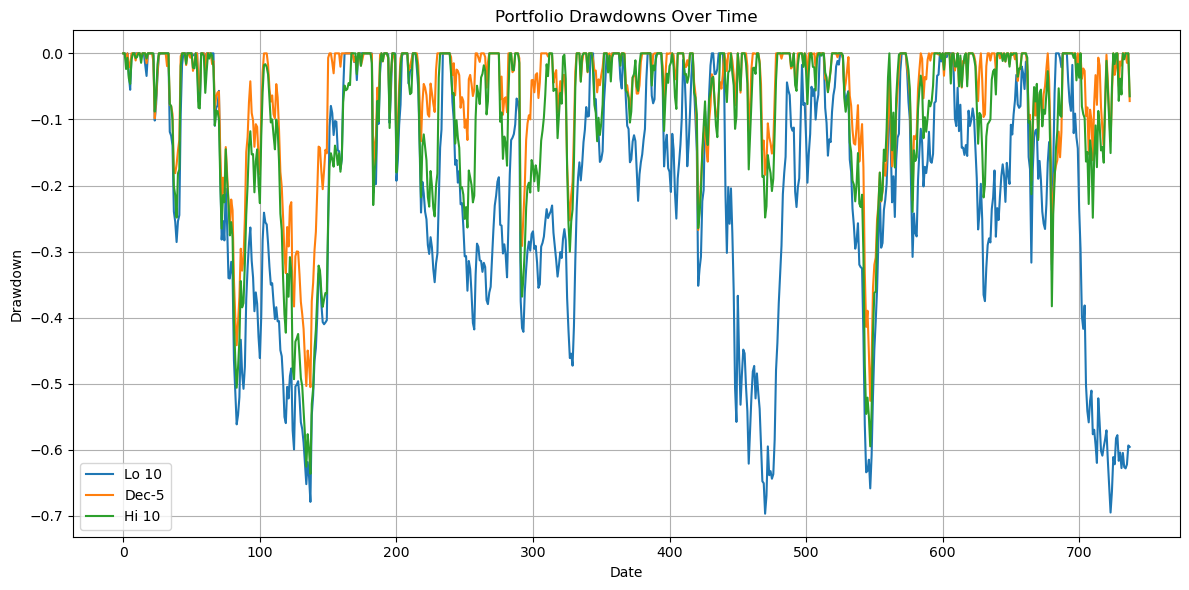

In [112]:
plt.figure(figsize=(12, 6))
for port in portfolios:
    plt.plot(drawdowns[port], label=port)
plt.title('Portfolio Drawdowns Over Time')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [114]:

print("\nSharpe Ratios:")
for port, ratio in sharpe_ratios.items():
    print(f"{port}: {ratio:.3f}")

print("\nRisk Measures:")
for port in portfolios:
    print(f"\n{port}:")
    print(f"Standard Deviation: {std_devs[port]:.3%}")
    print(f"Semi-Deviation: {semi_devs[port]:.3%}")
    print(f"Maximum Drawdown: {max_drawdowns[port]['value']:.3%}")
    max_drawdown_date = pd.to_datetime(max_drawdowns[port]['date'])  
    print(f"Max Drawdown Date: {max_drawdown_date.strftime('%Y-%m')}")


Sharpe Ratios:
Lo 10: 0.401
Dec-5: 0.719
Hi 10: 0.583

Risk Measures:

Lo 10:
Standard Deviation: 7.951%
Semi-Deviation: 5.414%
Maximum Drawdown: -69.668%
Max Drawdown Date: 1970-01

Dec-5:
Standard Deviation: 5.136%
Semi-Deviation: 3.781%
Maximum Drawdown: -52.587%
Max Drawdown Date: 1970-01

Hi 10:
Standard Deviation: 6.204%
Semi-Deviation: 4.502%
Maximum Drawdown: -63.624%
Max Drawdown Date: 1970-01


Sharpe Ratios and risk measures among the three portfolios (Lo 10, Dec-5, Hi 10)


Dec-5 has the highest Sharpe Ratio, suggesting it provides the best risk-adjusted return among the three portfolios. Lo 10 has the lowest Sharpe Ratio, indicating it offers the least favorable risk-adjusted return.


 Risk Measures
 
Dec-5 has the lowest standard deviation, indicating it is the least volatile portfolio, while Lo 10 is the most volatile.
 

Semi Deviation


Dec-5 has the lowest semi-deviation, suggesting it has the least downside risk. Lo 10 has the highest semi-deviation, indicating it is more prone to negative returns



Maximum Drawdown

   - Lo 10: -69.668%
   - Dec-5: -52.587%
   - Hi 10: -63.624%

   Lo 10 experiences the largest maximum drawdown, indicating it has the most significant potential loss from peak to trough. Dec-5 has the smallest maximum drawdown, suggesting it is the most resilient during downturns.

Semi-Deviations and Standard Deviations*Lo 1*: 
  - Standard Deviation: 7.951%
  - Semi-Deviation: 5.414%
- **c-5**: 
  - Standard Deviation: 5.136%
  - Semi-Deviation: 3.7
  
**Hi 10**: 
  - Standard Deviation: 6.204%
  - Semi-Deviation: 4.502%

The semi-deviation is consistently lower than the standard deviation for all portfolios, indicating that the portfolios are more volatile in the upward direction than in the downwarc-5 and Hi 10